In [1]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import itertools

In [2]:
model = Sequential()  

In [3]:
class Onehot2Int(object):
    """To plot the decision boundary"""
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [4]:
def theOriginalNN(X,Y):
    """
    The NN model which we will train and get the weights for the new
    NN model
    """    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    

    feature_vector_shape = len(X_train[0])
    input_shape = (feature_vector_shape,)
#     print("Input shape",input_shape)
#     print(f'Feature shape: {input_shape}')
    
    model.add(Dense(2,input_shape=input_shape, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))  


 
    es = [EarlyStopping(monitor='loss', mode='min', verbose=0, patience=500)]

    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
   

    print("Weights and biases of the layers before training the model: \n")
    #a=[]
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
            #a=np.append(layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

#     print(X_train.shape,Y_train.shape)
#     print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_tr = Y_train
    Y_train = to_categorical(Y_train)
#     print(Y_train.shape)
    Y_test = to_categorical(Y_test)
    
   
    e = 500   #The number of epochs
    #obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, callbacks=es)
    obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, epochs = e)
    
    print("Weights and biases of the layers after training the model: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
        
    #predict
    # pred = model.predict(X_train)
    # print("After Prediction of model", pred)
   
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Loss = np.transpose(Loss)
    print(Loss.shape)
    #print(Loss.shape)
    hist = obj.history["accuracy"]
    #n_epochs_best = np.argmax(hist)
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    graph_it(Loss, Epoch, Accuracy,scores,X_train, X_test, Y_train, Y_test, Y_tt)

#     weights = model.layers[0].get_weights()[0]
#     biases = model.layers[0].get_weights()[1]
    
    
    




In [5]:
def graph_it(Loss, Epoch, Accuracy,scores,X_train, X_test, Y_train, Y_test,Y_tt):
    """
    Creating all the graphs:
    1. Loss vs Epoch
    2. Accuracy vs Epoch
    3. The decision boundarys
    """
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    # Plot decision boundary
    keras_model_no_ohe = Onehot2Int(model)

    # Plot decision boundary
    
    plt.figure(figsize=(10,7))
    plot_decision_regions(X_test, Y_tt, clf=keras_model_no_ohe, legend=2)
    plt.show()
    
    

In [6]:
def theNewNN(X,Y):
    """
    The NN model which will be trained by the weights 
    we got by the OriginalNN()
    """
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    # es = EarlyStopping(monitor='loss', mode='min', verbose=0, patience=50)

    # model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
    
#     print(X_train.shape,Y_train.shape)
#     print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_train = to_categorical(Y_train)
#     print(Y_train.shape)
    Y_test = to_categorical(Y_test)
    

    
    # Setting new weights and biases
    # for layer in model.layers:
    #     a,b = layer.get_weights()[0].shape
    #     layer.set_weights([np.random.randn(a,b), np.ones(layer.get_weights()[1].shape)])
    a=[]

    for layer in model.layers:
        a=np.append(a,layer.get_weights()[0])
        
    es = [EarlyStopping(monitor='loss', mode='min', verbose=0, patience=500)]

    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'], loss_weights = a)

    print("Weights and biases of the layers after setting the new weights and biases: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
   
    e = 500   #The number of epochs
    #obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, callbacks=es)
    obj = model.fit(X_train, Y_train, shuffle = True, verbose=0, epochs=e)
    
    print("Weights and biases of the layers after setting the new weights and biases: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
    print("Bias")
    print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
    
    
    #predict
#     pred = model.predict(X_train)
#     print("After Prediction of model", pred)
    
    scores = model.evaluate(X_test, Y_test)
    L = np.array(obj.history["loss"])
    
    E = np.arange(e)
    A = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    graph_it(L, E, A,scores,X_train, X_test, Y_train, Y_test, Y_tt)


    



In [7]:
#Old Dataset
def OldDataset():
    """
    The dataset for the original model
    """
    #Class 1
    mean = [5,5]
    cov = [[10,0],
           [0,10]] 
    Class1 = np.random.multivariate_normal(mean,cov,1000)

    #Class 2
    mean = [-5,5]
    cov = [[10,0],
           [0,10]] 
    Class2 = np.random.multivariate_normal(mean,cov,1000)    
    

    X = np.vstack([Class1, Class2])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    theOriginalNN(X,Y)
    

In [8]:
#New Dataset
def NewDataset(i):
    """
    The dataset for the new model
    """
    #Class 3
    mean = [i,i]
    cov = [[10,0],
           [0,10]] 
    Class3 = np.random.multivariate_normal(mean,cov,1000)

    #Class 4
    mean = [(-i),i]
    cov = [[10,0],
           [0,10]] 
    Class4 = np.random.multivariate_normal(mean,cov,1000)
    
    X = np.vstack([Class3, Class4])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    
    
    theNewNN(X,Y)

****************************The Original NN*************************************


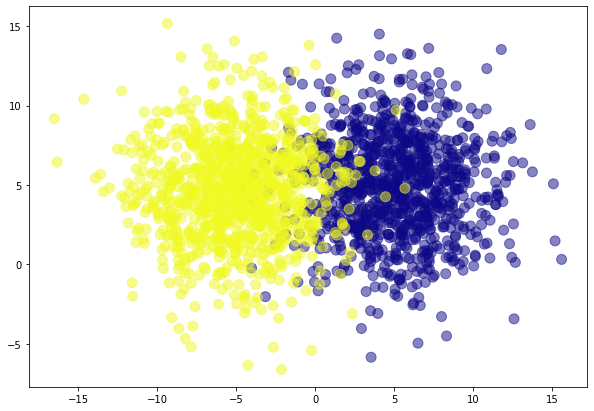

Weights and biases of the layers before training the model: 

dense
Weights
Shape:  (2, 2) 
 [[-0.13341594 -0.08520615]
 [-0.23118347 -0.88812125]]
Bias
Shape:  (2,) 
 [0. 0.] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  0.84341335  0.8233628   0.49728847]
 [-0.13799667  0.16463089  0.6041095  -0.3159778 ]]
Bias
Shape:  (4,) 
 [0. 0. 0. 0.] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [ 0.36170983  0.45058513]
 [-0.15725327 -0.49316216]
 [ 0.4918077   0.62896085]]
Bias
Shape:  (2,) 
 [0. 0.] 

Weights and biases of the layers after training the model: 

dense
Weights
Shape:  (2, 2) 
 [[-0.20490569 -0.4821873 ]
 [-0.01912671 -1.0829179 ]]
Bias
Shape:  (2,) 
 [ 1.1097711 -0.5316797] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5900718   1.0256913   1.2418901 ]
 [-0.13799667  0.14297004  0.5360357  -0.70886624]]
Bias
Shape:  (4,) 
 [ 0.         -0.00069995 -0.00141878 -0.00395431] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.26022848  1.

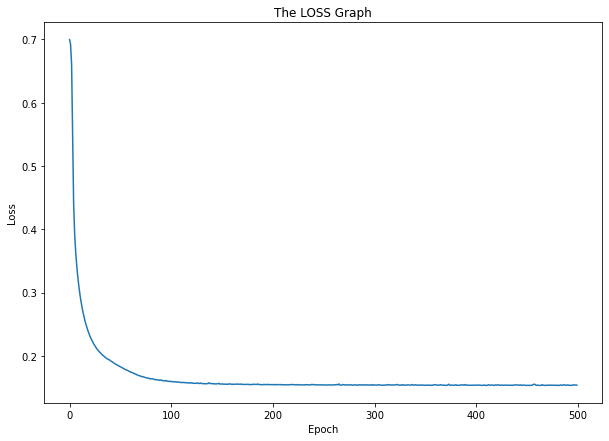

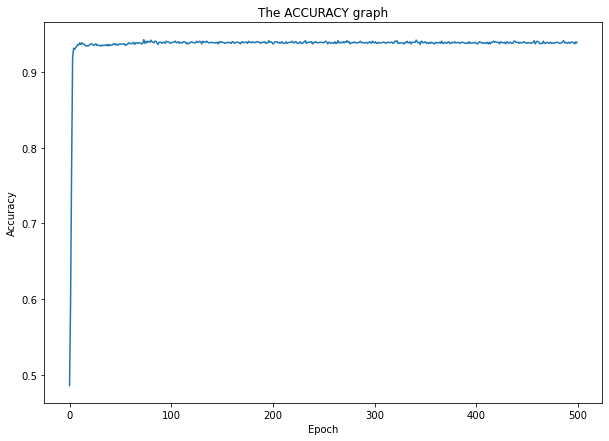

Test results - Loss: 0.1458635777235031 - Accuracy: 94.9999988079071%


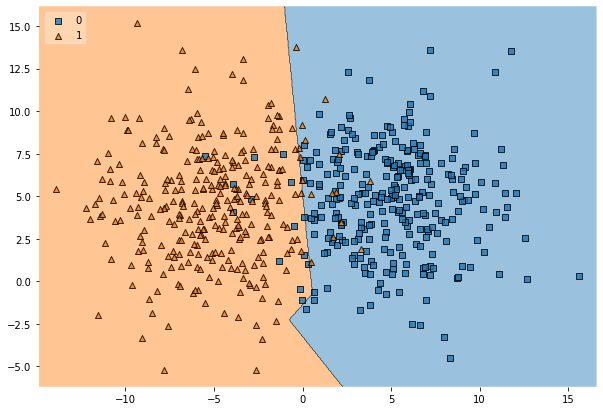


**************************The  1  NN************************************


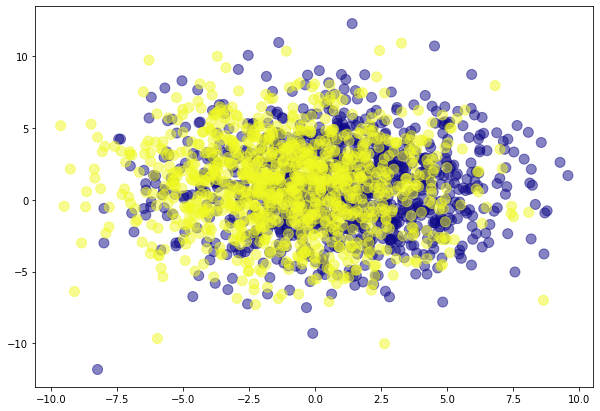

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.20490569 -0.4821873 ]
 [-0.01912671 -1.0829179 ]]
Bias
Shape:  (2,) 
 [ 1.1097711 -0.5316797] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5900718   1.0256913   1.2418901 ]
 [-0.13799667  0.14297004  0.5360357  -0.70886624]]
Bias
Shape:  (4,) 
 [ 0.         -0.00069995 -0.00141878 -0.00395431] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.26022848  1.0725191 ]
 [-0.65198016  0.00156318]
 [-0.26715845  1.3879248 ]]
Bias
Shape:  (2,) 
 [ 2.4416904 -2.44169  ] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.04935158  0.2178182 ]
 [ 0.00810827 -0.65134186]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5216631   0.94103265  1.1604848 ]
 [-0.13799667  0.14313775  0.5253581  -0.27248815]]
dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.1946368   1.0069231 ]
 [-0.5878

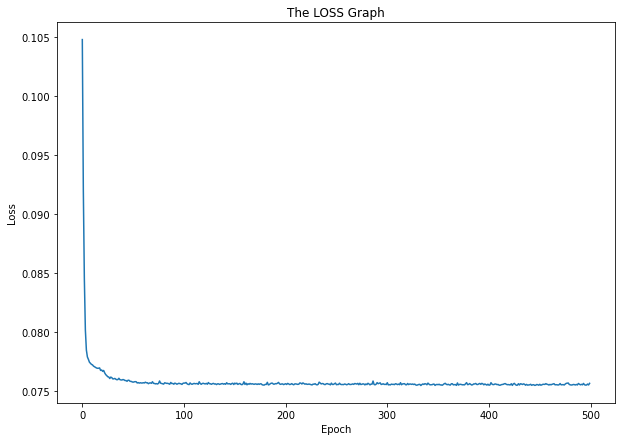

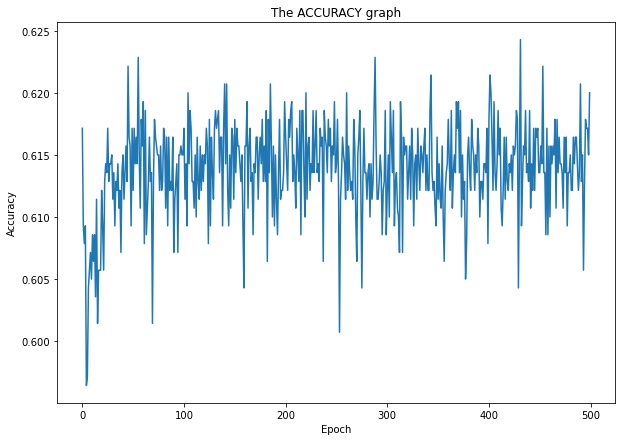

Test results - Loss: 0.07570289075374603 - Accuracy: 60.00000238418579%


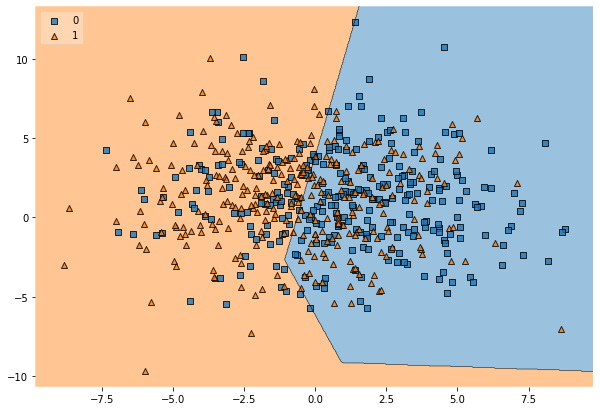


**************************The  2  NN************************************


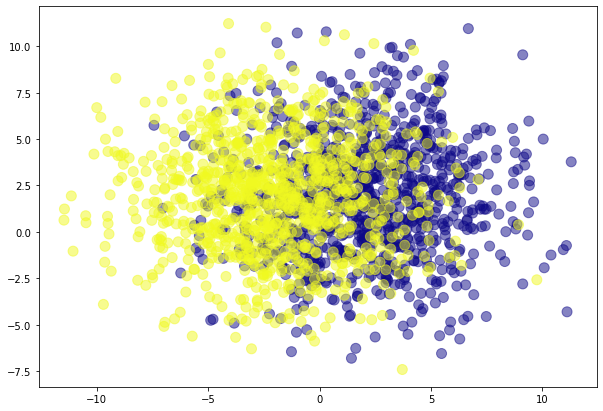

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.04935158  0.2178182 ]
 [ 0.00810827 -0.65134186]]
Bias
Shape:  (2,) 
 [ 1.1725769 -1.5064907] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5216631   0.94103265  1.1604848 ]
 [-0.13799667  0.14313775  0.5253581  -0.27248815]]
Bias
Shape:  (4,) 
 [0.         0.08563744 0.06672661 0.04520213] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.1946368   1.0069231 ]
 [-0.5878635  -0.06254946]
 [-0.03963406  1.160402  ]]
Bias
Shape:  (2,) 
 [ 2.3335044 -2.3335032] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.11496241  0.18372083]
 [ 0.00789189 -0.80653626]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.503133    0.9030344   1.1745955 ]
 [-0.13799667  0.11708797  0.4862605  -0.11566162]]
dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.17873845  0.9910209 ]
 [-0.5601992 

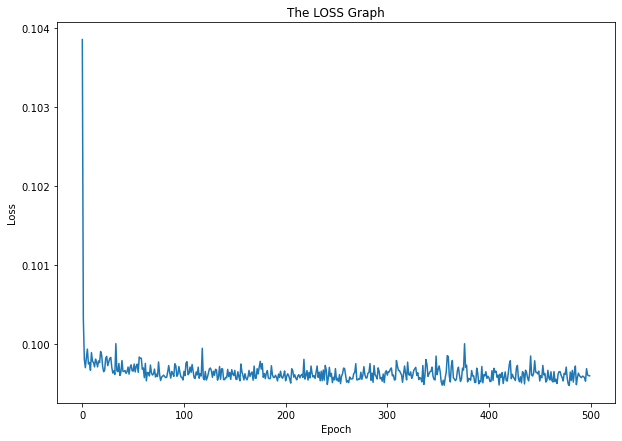

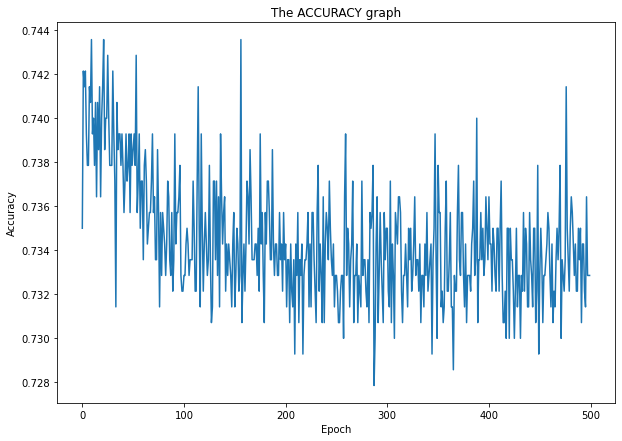

Test results - Loss: 0.10350248962640762 - Accuracy: 73.66666793823242%


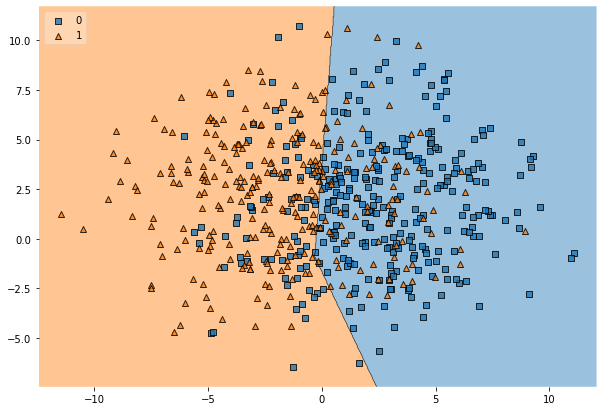


**************************The  3  NN************************************


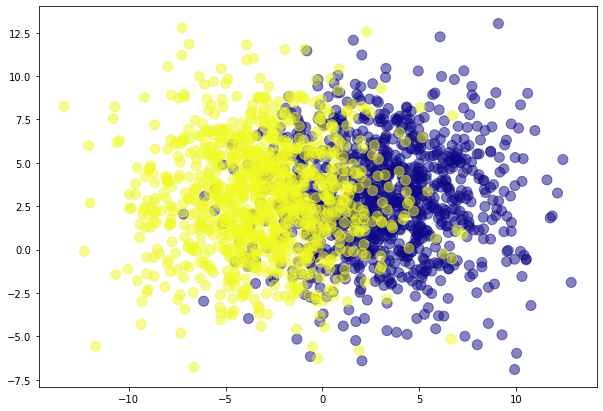

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.11496241  0.18372083]
 [ 0.00789189 -0.80653626]]
Bias
Shape:  (2,) 
 [ 1.1887388 -0.6637867] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.503133    0.9030344   1.1745955 ]
 [-0.13799667  0.11708797  0.4862605  -0.11566162]]
Bias
Shape:  (4,) 
 [0.         0.10933143 0.07071899 0.04251678] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.17873845  0.9910209 ]
 [-0.5601992  -0.09021143]
 [-0.04028415  1.1610457 ]]
Bias
Shape:  (2,) 
 [ 2.2948902 -2.2948892] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.1605146  -0.07824692]
 [ 0.00814382 -0.6268204 ]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5112998   0.88877195  1.1834373 ]
 [-0.13799667  0.08871303  0.45114374 -0.00786079]]
dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.18685286  0.9991327 ]
 [-0.5574576 

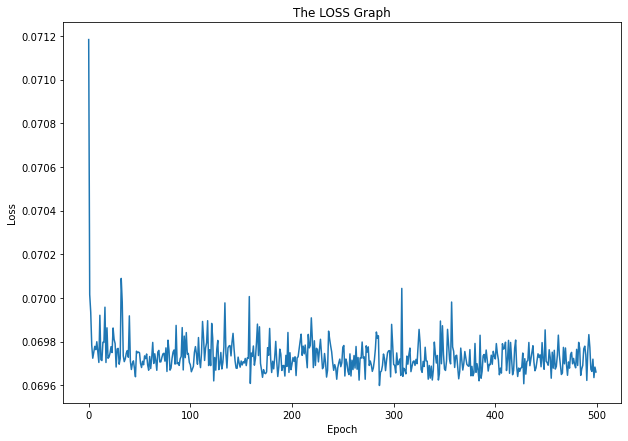

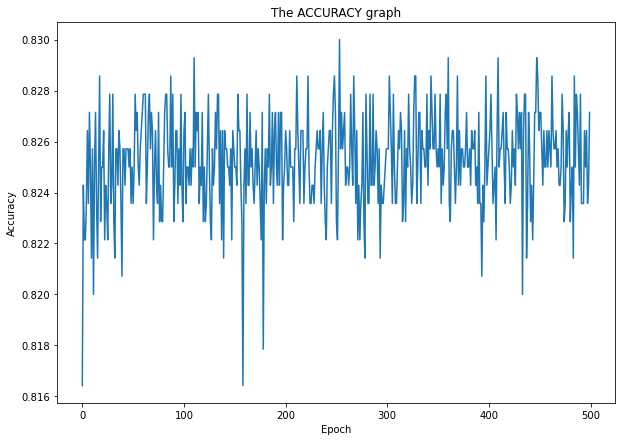

Test results - Loss: 0.06945059448480606 - Accuracy: 82.4999988079071%


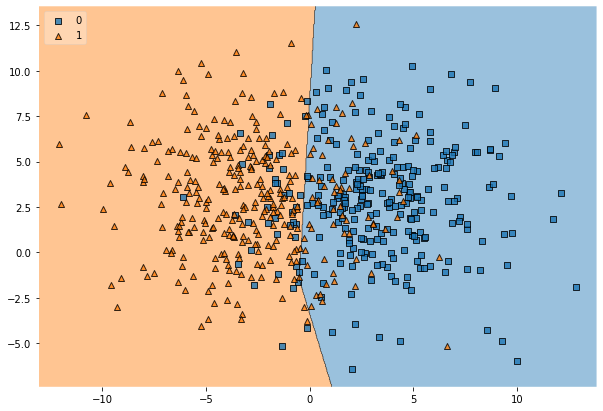


**************************The  4  NN************************************


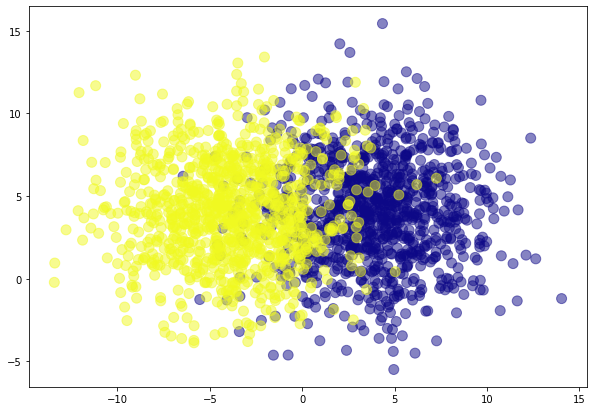

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.1605146  -0.07824692]
 [ 0.00814382 -0.6268204 ]]
Bias
Shape:  (2,) 
 [ 1.2276489  -0.97835165] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5112998   0.88877195  1.1834373 ]
 [-0.13799667  0.08871303  0.45114374 -0.00786079]]
Bias
Shape:  (4,) 
 [ 0.          0.02015683 -0.00258516 -0.00134382] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.18685286  0.9991327 ]
 [-0.5574576  -0.09295381]
 [-0.04681136  1.1675769 ]]
Bias
Shape:  (2,) 
 [ 2.3696544 -2.369653 ] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.19915901 -0.10127153]
 [ 0.00080612 -0.71425414]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5246577   0.87675357  1.1982515 ]
 [-0.13799667 -0.36410922 -0.06372601 -0.43371308]]
dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.20967643  1.0219566 ]
 [-0.54

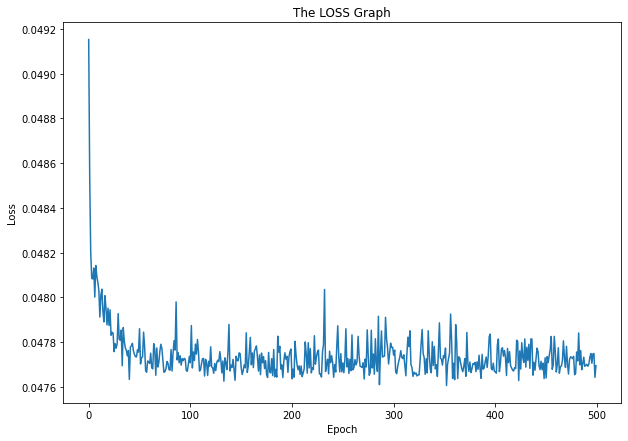

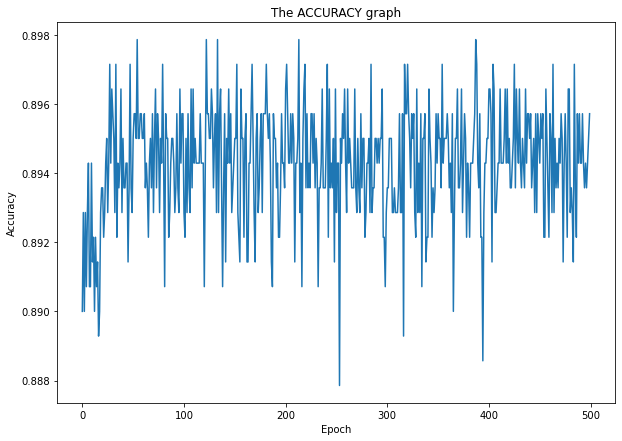

Test results - Loss: 0.045716408640146255 - Accuracy: 89.49999809265137%


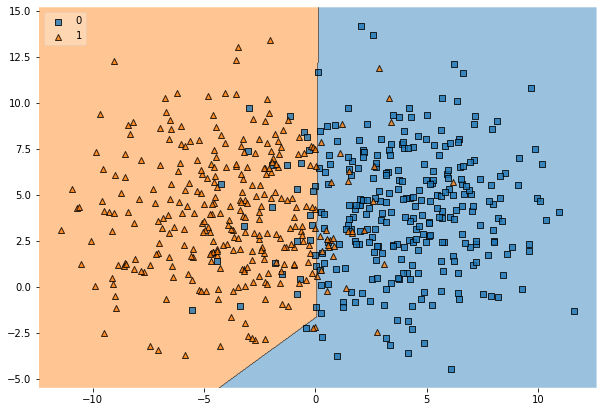


**************************The  5  NN************************************


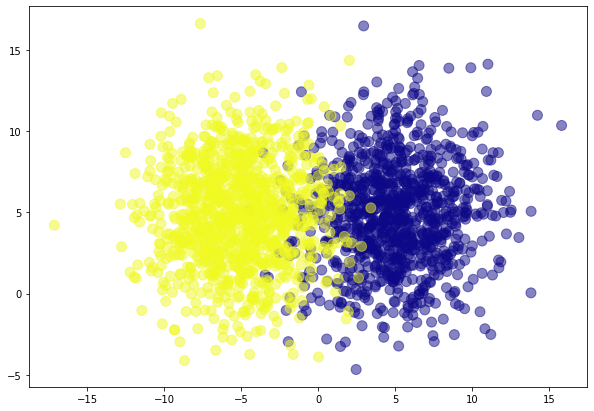

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.19915901 -0.10127153]
 [ 0.00080612 -0.71425414]]
Bias
Shape:  (2,) 
 [ 1.275163  -1.1592987] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5246577   0.87675357  1.1982515 ]
 [-0.13799667 -0.36410922 -0.06372601 -0.43371308]]
Bias
Shape:  (4,) 
 [ 0.          0.00190233 -0.00036394  0.00205096] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.20967643  1.0219566 ]
 [-0.54825604 -0.102157  ]
 [-0.07395343  1.1947242 ]]
Bias
Shape:  (2,) 
 [ 2.3917005 -2.3916996] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.26610598 -0.03037311]
 [ 0.016402   -0.512241  ]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5627817   0.894962    1.2367085 ]
 [-0.13799667  0.7925526   1.1010149   0.72409165]]
dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.2511384   1.0634228 ]
 [-0.6068

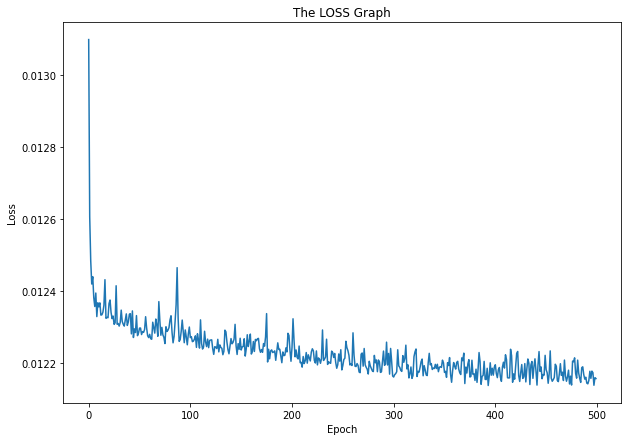

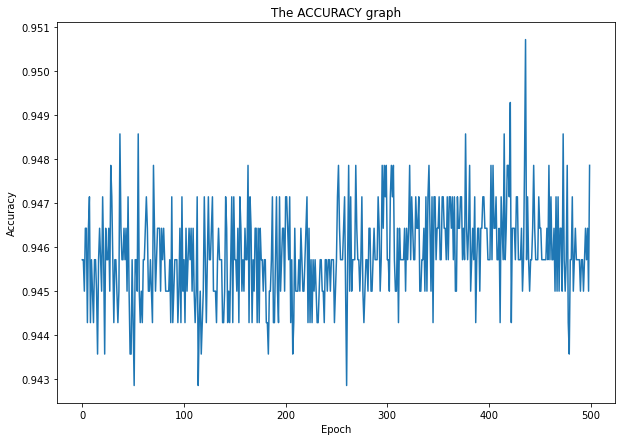

Test results - Loss: 0.010901962406933308 - Accuracy: 95.83333134651184%


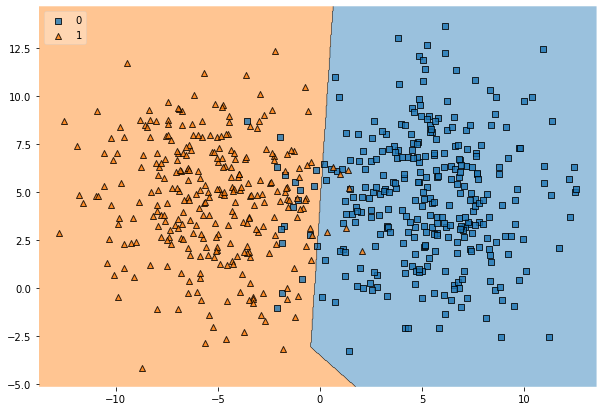


**************************The  6  NN************************************


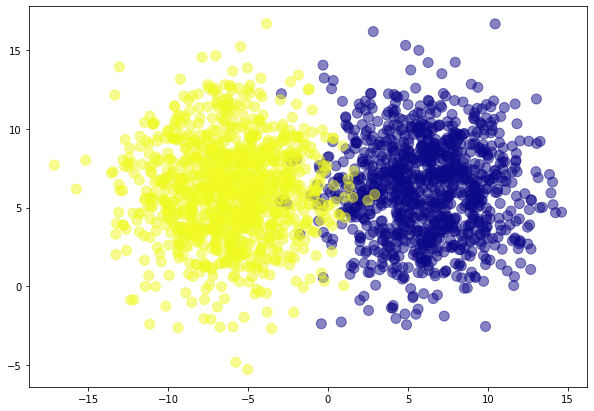

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.26610598 -0.03037311]
 [ 0.016402   -0.512241  ]]
Bias
Shape:  (2,) 
 [ 1.3363774 -1.5841397] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5627817   0.894962    1.2367085 ]
 [-0.13799667  0.7925526   1.1010149   0.72409165]]
Bias
Shape:  (4,) 
 [ 0.         -0.00108204 -0.00136041 -0.00108093] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.2511384   1.0634228 ]
 [-0.60685986 -0.04355079]
 [-0.10852966  1.229302  ]]
Bias
Shape:  (2,) 
 [ 2.9643776 -2.9643767] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-2.8989571e-01 -1.1193402e+00]
 [-8.8554184e-04 -3.8513219e-01]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5991691   0.9162736   1.273282  ]
 [-0.13799667  3.619629    3.8808565   3.550823  ]]
dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.29216596  1.1044431

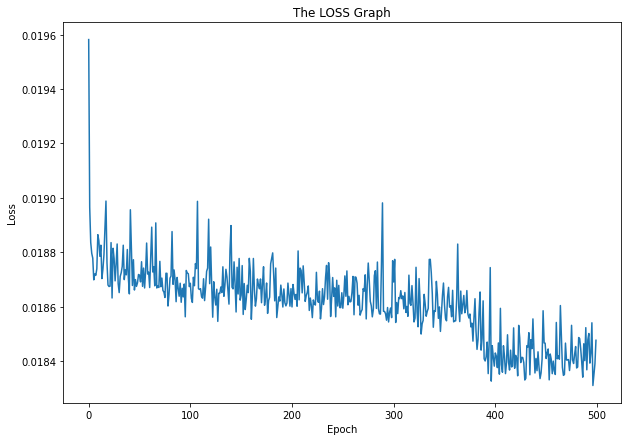

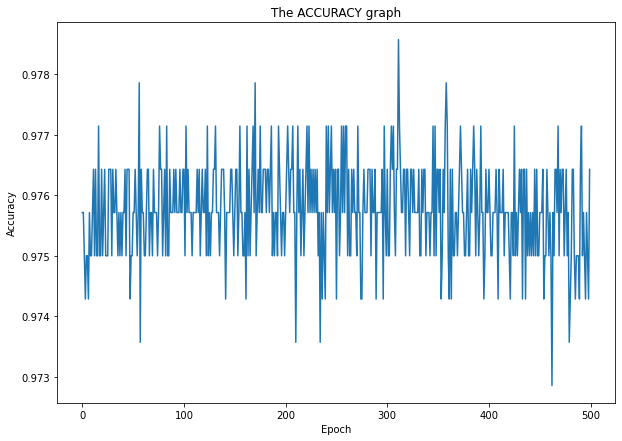

Test results - Loss: 0.01205969974398613 - Accuracy: 98.00000190734863%


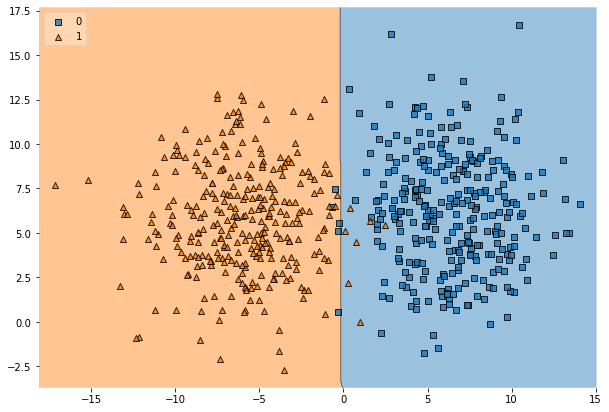


**************************The  7  NN************************************


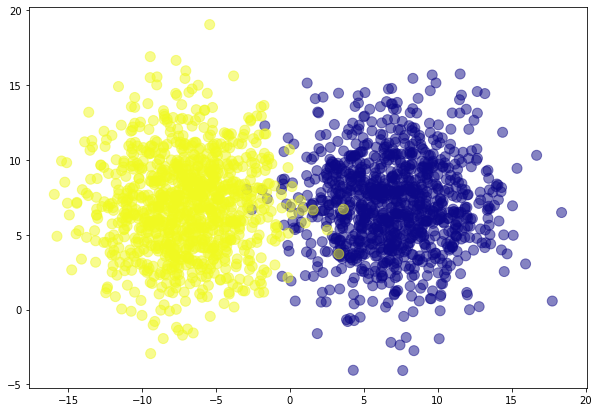

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-2.8989571e-01 -1.1193402e+00]
 [-8.8554184e-04 -3.8513219e-01]]
Bias
Shape:  (2,) 
 [ 1.4200503 -1.47054  ] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5991691   0.9162736   1.273282  ]
 [-0.13799667  3.619629    3.8808565   3.550823  ]]
Bias
Shape:  (4,) 
 [ 0.         -0.00037403 -0.00063532 -0.00037379] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.29216596  1.1044431 ]
 [-0.6424183  -0.00799049]
 [-0.14756006  1.2683269 ]]
Bias
Shape:  (2,) 
 [ 3.3779922 -3.3779912] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.31714803 -1.28568   ]
 [ 0.00459204 -0.32664624]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5922076   0.89458245  1.2664891 ]
 [-0.13799667  8.307951    8.566311    8.239107  ]]
dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.29684085  1.1091155

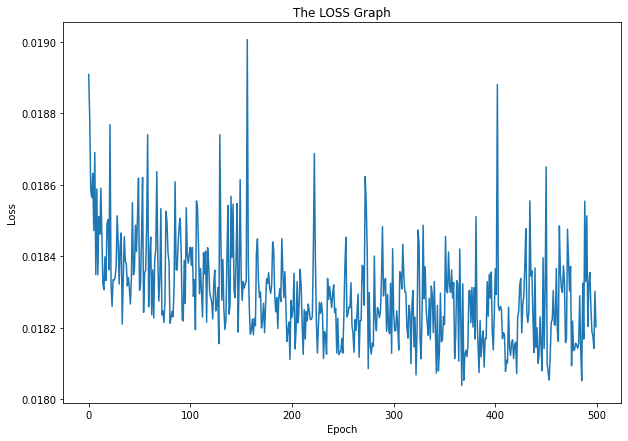

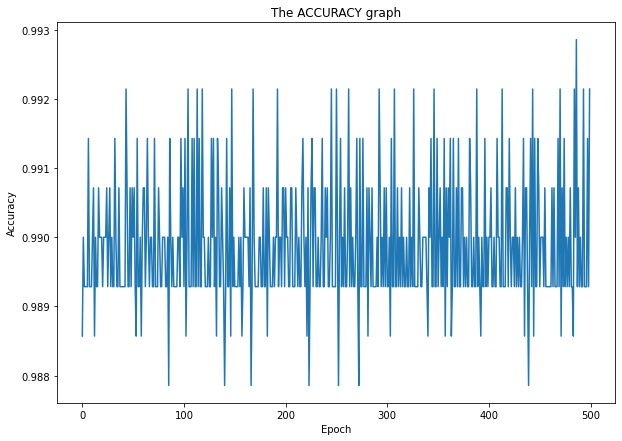

Test results - Loss: 0.035112570971250534 - Accuracy: 98.33333492279053%


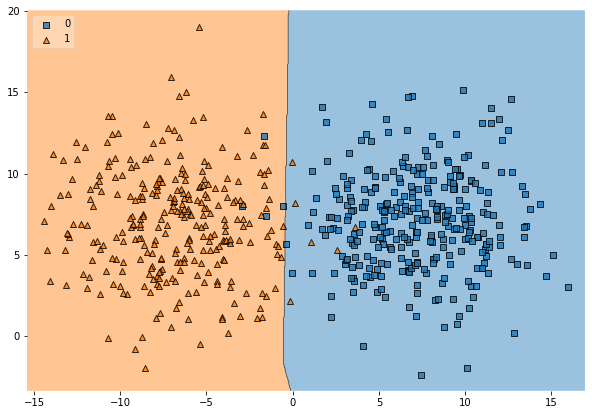


**************************The  8  NN************************************


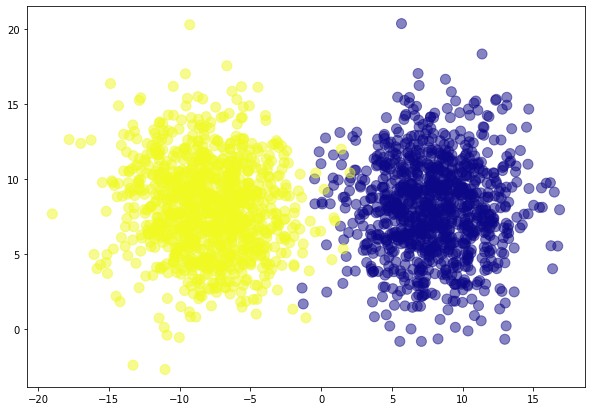

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.31714803 -1.28568   ]
 [ 0.00459204 -0.32664624]]
Bias
Shape:  (2,) 
 [ 1.453048  -1.2288343] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.5922076   0.89458245  1.2664891 ]
 [-0.13799667  8.307951    8.566311    8.239107  ]]
Bias
Shape:  (4,) 
 [ 0.         -0.00219494 -0.00246044 -0.00218282] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.29684085  1.1091155 ]
 [-0.64727914 -0.00312346]
 [-0.15195657  1.2727231 ]]
Bias
Shape:  (2,) 
 [ 3.7412443 -3.7412434] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.27088255 -1.2958107 ]
 [ 0.00725431 -0.22707373]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.6067271   0.8959782   1.2811387 ]
 [-0.13799667  9.119306    9.373894    9.050345  ]]
dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.31715193  1.1294293 ]
 [-0.6632

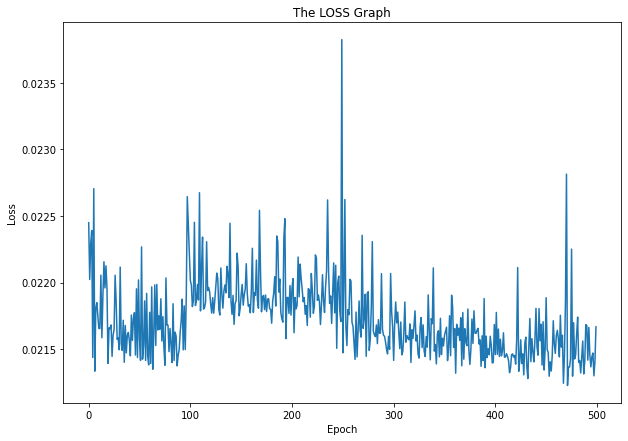

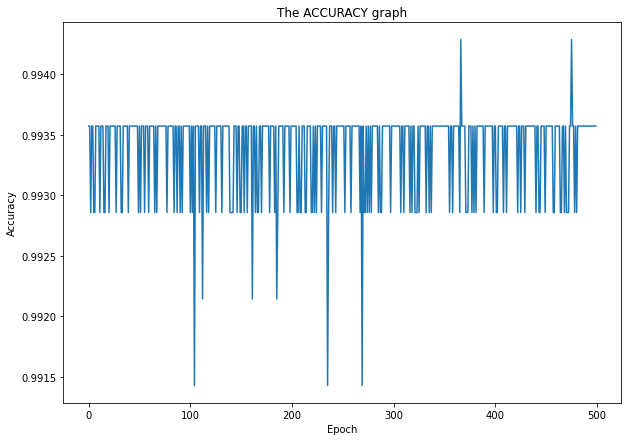

Test results - Loss: 0.02190740965306759 - Accuracy: 99.50000047683716%


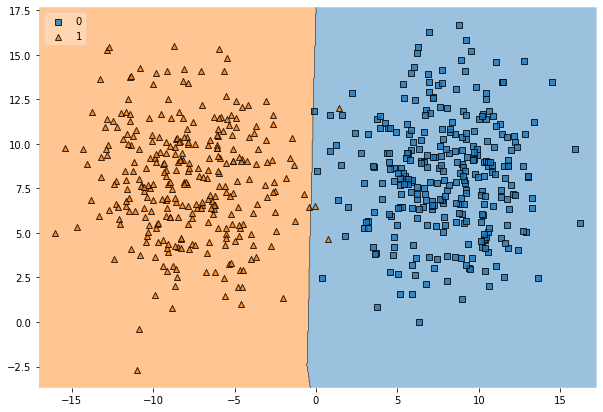


**************************The  9  NN************************************


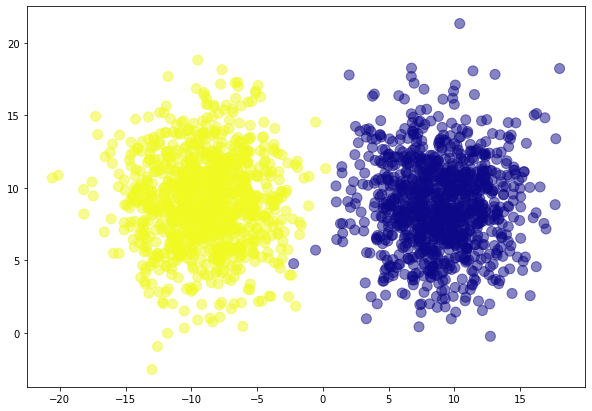

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.27088255 -1.2958107 ]
 [ 0.00725431 -0.22707373]]
Bias
Shape:  (2,) 
 [ 1.5216262 -1.2754261] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.6067271   0.8959782   1.2811387 ]
 [-0.13799667  9.119306    9.373894    9.050345  ]]
Bias
Shape:  (4,) 
 [ 0.         -0.00179349 -0.00212209 -0.00178658] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.31715193  1.1294293 ]
 [-0.66326505  0.01286033]
 [-0.17079452  1.2915568 ]]
Bias
Shape:  (2,) 
 [ 3.9669042 -3.9669037] 

Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.071223   -1.3184308 ]
 [ 0.3039838  -0.20403521]]
dense_1
Weights
Shape:  (2, 4) 
 [[-0.25988293  1.456047    0.73546374  1.1307244 ]
 [-0.13799667  9.144814    9.398475    9.075276  ]]
dense_2
Weights
Shape:  (4, 2) 
 [[-0.6077895  -0.00650287]
 [-0.2749113   1.087191  ]
 [-0.7503

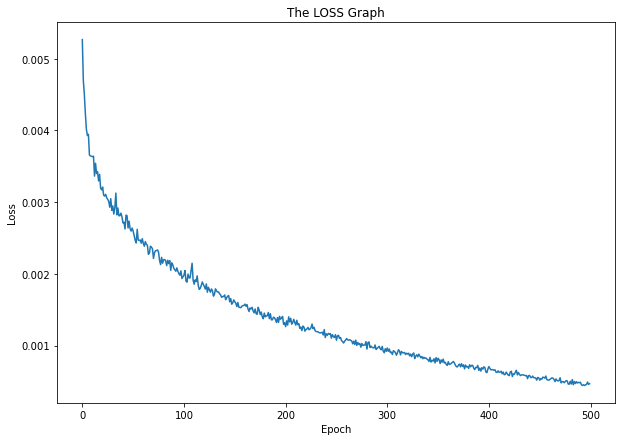

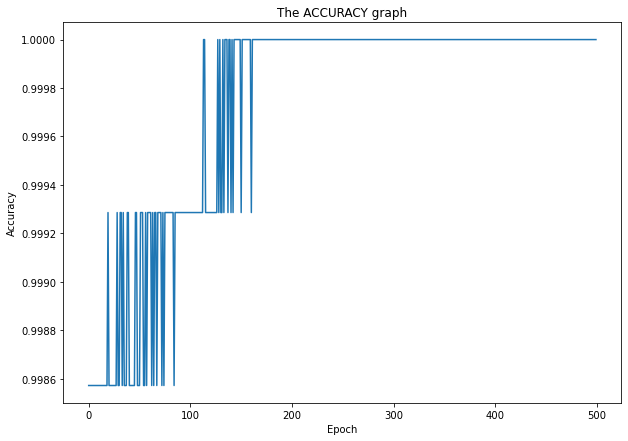

Test results - Loss: 0.07595991343259811 - Accuracy: 99.6666669845581%


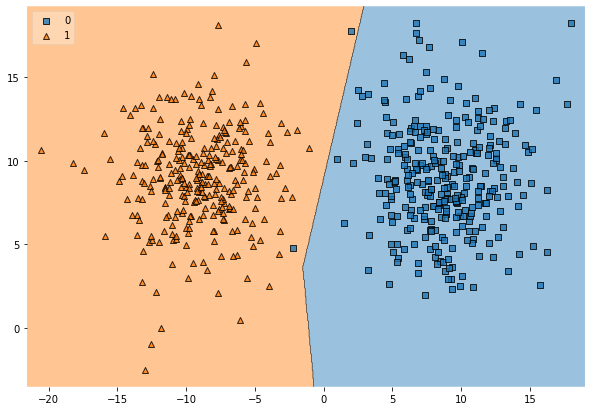

In [9]:
def main():
    
    print("****************************The Original NN*************************************")
    OldDataset()
    for i in range (1,10): 
        print("\n**************************The ",i," NN************************************")
        NewDataset(i)
    
#     print("****************************THE NEW NN**********************************")
#     NewDataset(4)
    
if __name__ == "__main__":
    main()